0x000b
0x000c
-
Valores únicos en la columna sport:
sport
0        38672
47439    27728
1043     23836
80        1140
53         624
         ...  
231          4
15092        4
53308        4
46201        4
36687        4
Name: count, Length: 64541, dtype: int64


Valores únicos en la columna dsport:
dsport
53       549184
80       298508
5190     163736
6881     139564
25       121168
          ...  
31155         4
42164         4
47469         4
45940         4
30186         4
Name: count, Length: 62222, dtype: int64


0xc0a8
-
0x20205321
<class 'pandas.core.frame.DataFrame'>
Index: 2799732 entries, 0 to 2799999
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   srcip       object 
 1   sport       int16  
 2   dstip       object 
 3   dsport      int16  
 4   proto       object 
 5   sbytes      int32  
 6   dbytes      int32  
 7   sttl        int32  
 8   dttl        int32  
 9   sloss       int32  
 10  dloss       int32  
 11  service     o

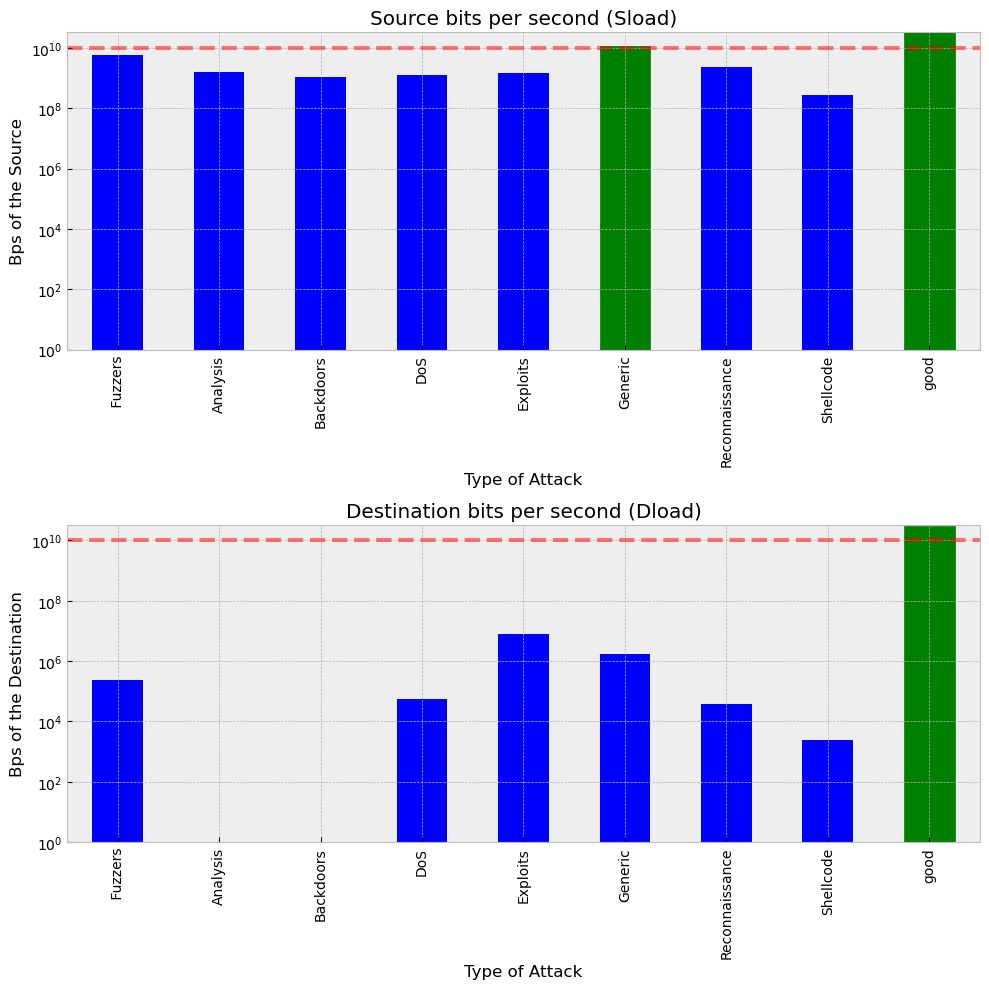

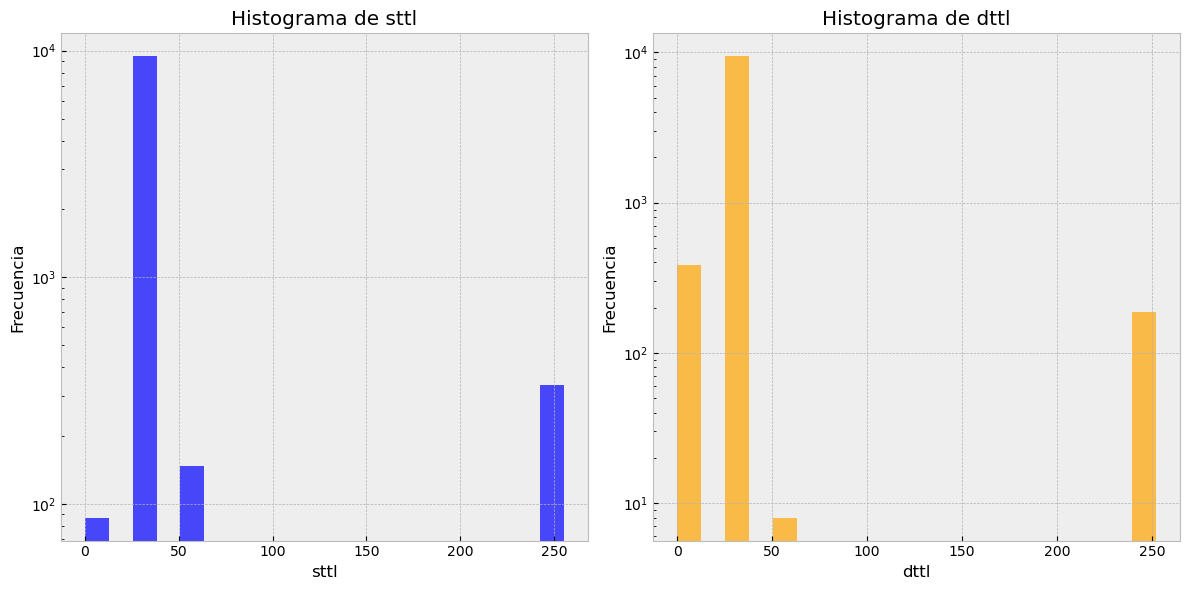

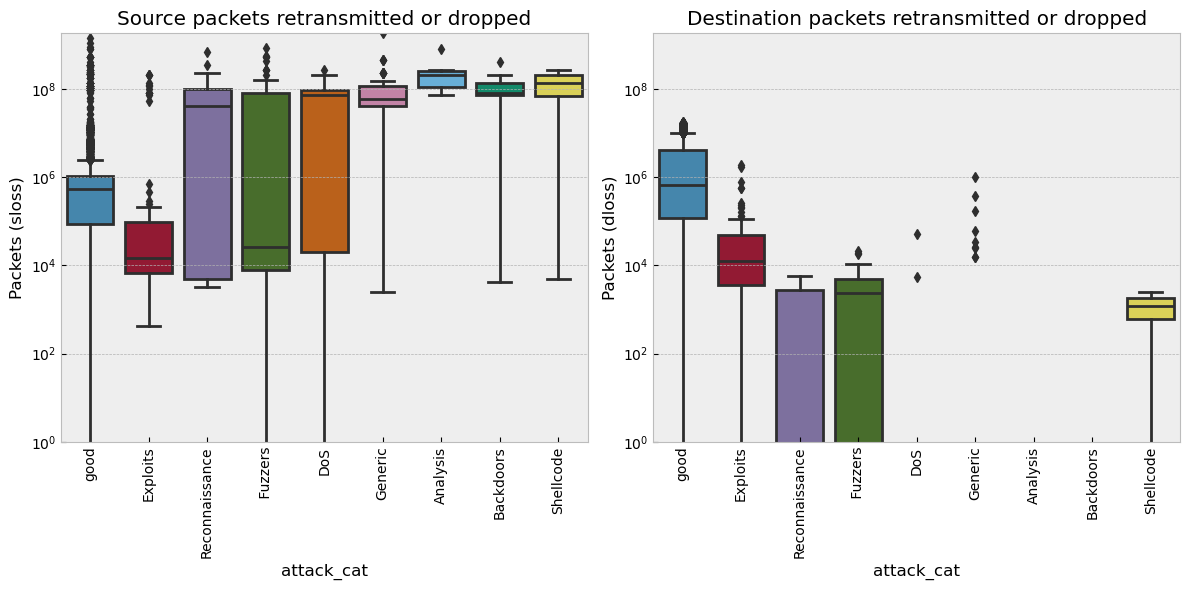

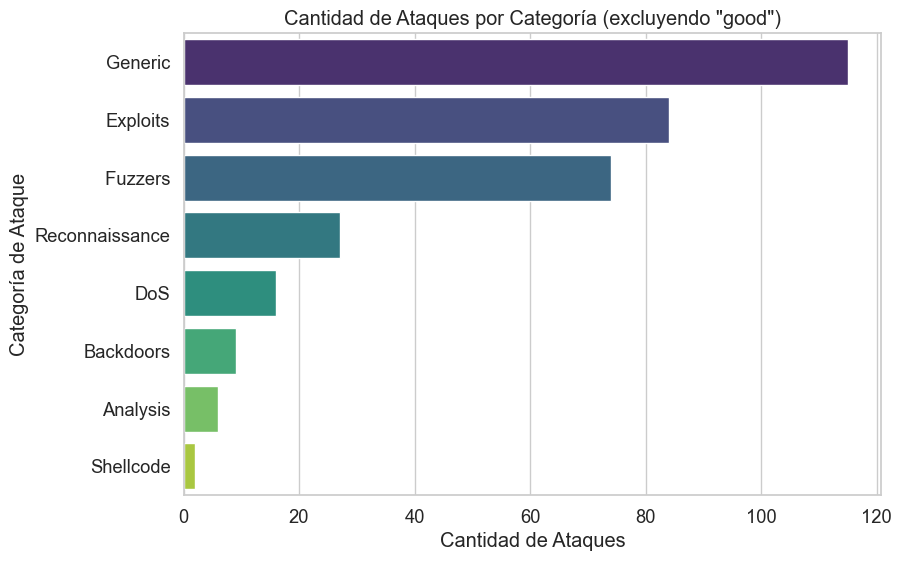

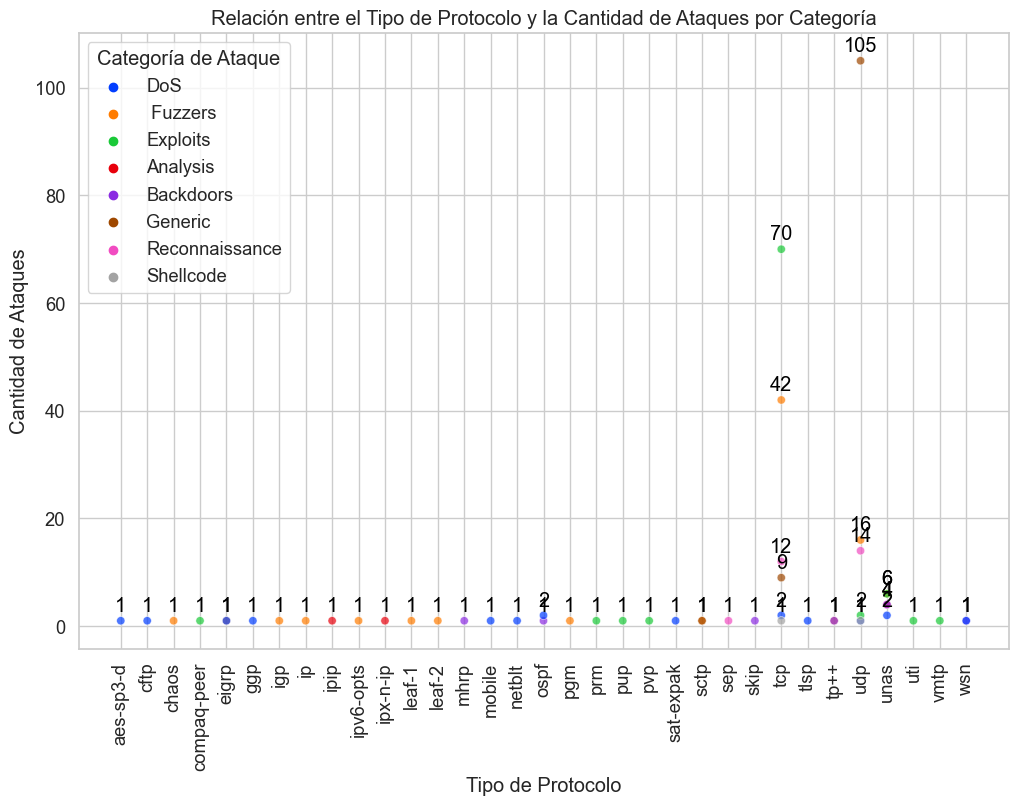

In [1]:
%run ProyectoDS_ParteI_AguirreJorge.ipynb

In [2]:
df.sample()

,srcip,sport,dstip,dsport,proto,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,Stime,Ltime,attack_cat,Label
2177831,59.166.0.0,14280,149.171.126.4,111,udp,568,312,31,29,0,0,-,750660.75,412334.7813,4,4,1421930516,1421930516,good,0


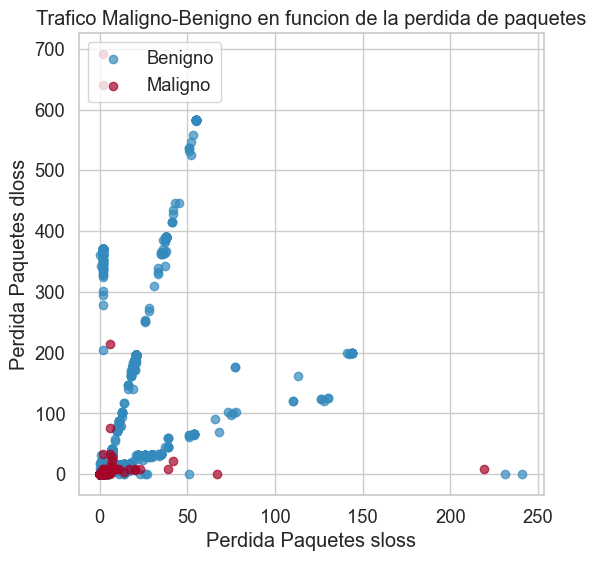

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['Label']==0]['sloss'], df[df['Label']==0]['dloss'], alpha=0.7)
ax.scatter(df[df['Label']==1]['sloss'], df[df['Label']==1]['dloss'], alpha=0.7)

ax.set_title('Trafico Maligno-Benigno en funcion de la perdida de paquetes')
ax.set_xlabel('Perdida Paquetes sloss')
ax.set_ylabel('Perdida Paquetes dloss')
ax.legend(['Benigno', 'Maligno'], loc='upper left')

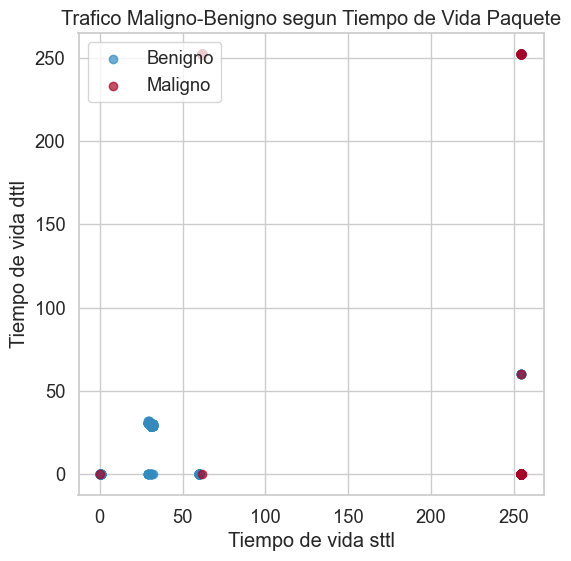

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['Label']==0]['sttl'], df[df['Label']==0]['dttl'], alpha=0.7)
ax.scatter(df[df['Label']==1]['sttl'], df[df['Label']==1]['dttl'], alpha=0.7)

ax.set_title('Trafico Maligno-Benigno segun Tiempo de Vida Paquete')
ax.set_xlabel('Tiempo de vida sttl')
ax.set_ylabel('Tiempo de vida dttl')
ax.legend(['Benigno', 'Maligno'], loc='upper left')

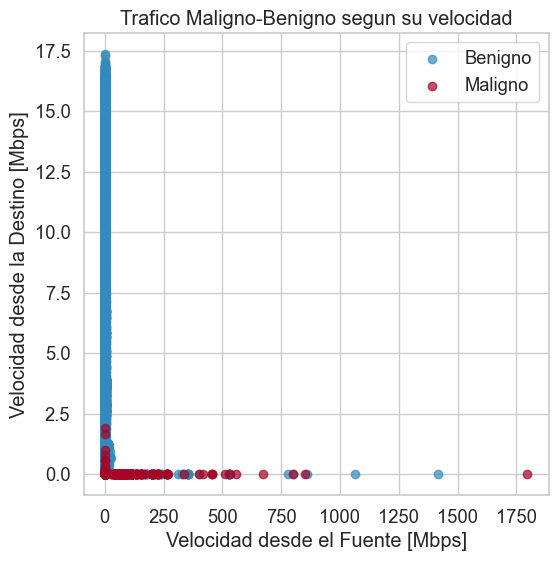

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['Label']==0]['Sload']/1e6, df[df['Label']==0]['Dload']/1e6, alpha=0.7)
ax.scatter(df[df['Label']==1]['Sload']/1e6, df[df['Label']==1]['Dload']/1e6, alpha=0.7)

ax.set_title('Trafico Maligno-Benigno segun su velocidad')
ax.set_xlabel('Velocidad desde el Fuente [Mbps]')
ax.set_ylabel('Velocidad desde la Destino [Mbps]')
ax.legend(['Benigno', 'Maligno'], loc='upper right')

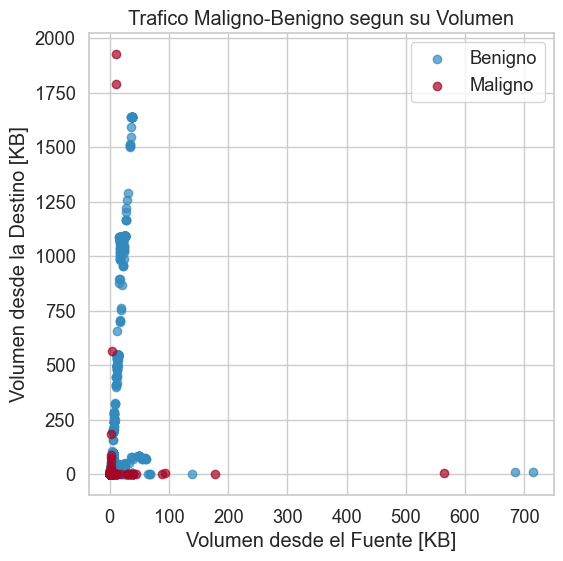

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df[df['Label']==0]['sbytes']/1000, df[df['Label']==0]['dbytes']/1000, alpha=0.7)
ax.scatter(df[df['Label']==1]['sbytes']/1000, df[df['Label']==1]['dbytes']/1000, alpha=0.7)

ax.set_title('Trafico Maligno-Benigno segun su Volumen')
ax.set_xlabel('Volumen desde el Fuente [KB]')
ax.set_ylabel('Volumen desde la Destino [KB]')
ax.legend(['Benigno', 'Maligno'], loc='upper right')

In [7]:
# Agrupar  y contar la cantidad de registros en cada grupo
#grouped_df = df.groupby(['abs_sport', 'abs_dsport', 'Label']).size().reset_index(name='count')
gr_df_sport = df.groupby(['sport', 'Label']).size().reset_index(name='count')
gr_df_dsport = df.groupby(['dsport', 'Label']).size().reset_index(name='count')

In [8]:
#(gr_df_sport['count'] > 3)
gr_sport=gr_df_sport[gr_df_sport['Label'] == 1]
#print(gr_sport)
# Calcular el porcentaje para gr_df_sport
total_sport = gr_sport['count'].sum()
print('total_sport:',total_sport,'\n')

total_sport: 333 



In [9]:
#gr_sport.loc[:,'percentage'] = (gr_sport['count'] / total_sport) * 100
new_sport=gr_sport.copy()
new_sport['percentage'] = (gr_sport['count'] / total_sport) * 100
new_sport[new_sport['percentage']>5]

,sport,Label,count,percentage
1,0,1,58,17.417417
170,1043,1,48,14.414414
4552,18097,1,56,16.816817


In [10]:
#(gr_df_sport['count'] > 3)
gr_dsport=gr_df_dsport[gr_df_dsport['Label'] == 1]
#print(gr_sport)
# Calcular el porcentaje para gr_df_sport
total_dsport = gr_dsport['count'].sum()
print('total_dsport:',total_dsport,'\n')

total_dsport: 333 



In [11]:
#gr_sport.loc[:,'percentage'] = (gr_sport['count'] / total_sport) * 100
new_dsport=gr_dsport.copy()
new_dsport['percentage'] = (gr_dsport['count'] / total_dsport) * 100
new_dsport[new_dsport['percentage']>5]

,dsport,Label,count,percentage
1,0,1,58,17.417417
11,53,1,105,31.531532
14,80,1,44,13.213213
19,111,1,23,6.906907
29,179,1,20,6.006006


In [12]:
# Convertir las columnas 'sport' y 'dsport' a listas
sport_list = new_sport[new_sport['percentage']>5]['sport'].tolist()
print('sport_list: ',sport_list)
dsport_list = new_dsport[new_dsport['percentage']>5]['dsport'].tolist()
print('dsport_list: ',dsport_list)

sport_list:  [0, 1043, 18097]
dsport_list:  [0, 53, 80, 111, 179]


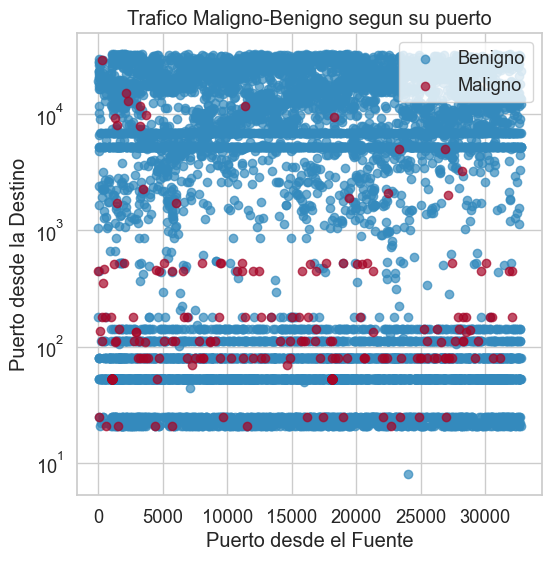

In [13]:
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(df[df['Label']==0]['sport'], df[df['Label']==0]['dsport'], alpha=0.7)
    ax.scatter(df[df['Label']==1]['sport'], df[df['Label']==1]['dsport'], alpha=0.7)

    # Establecer la escala logarítmica en el eje y
    ax.set_yscale('log')

    ax.set_title('Trafico Maligno-Benigno segun su puerto')
    ax.set_xlabel('Puerto desde el Fuente')
    ax.set_ylabel('Puerto desde la Destino')
    ax.legend(['Benigno', 'Maligno'], loc='upper right')

In [14]:
gr_df_sport

,sport,Label,count
0,0,0,86
1,0,1,58
2,2,0,1
3,3,0,2
4,14,1,1
...,...,...,...
8342,32749,0,1
8343,32755,0,1
8344,32761,0,2
8345,32764,0,2


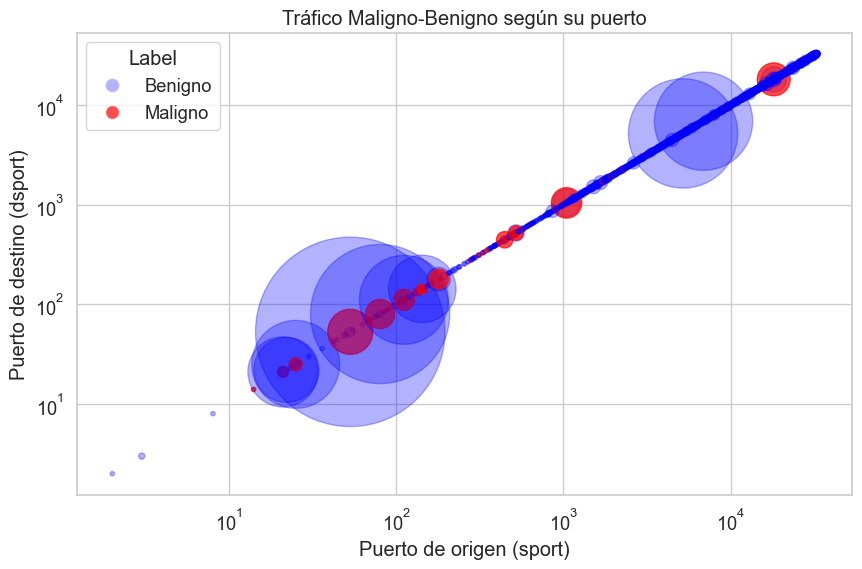

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
fig, ax = plt.subplots(figsize=(10, 6))

# Concatenar ambos DataFrames
combined_df = pd.concat([gr_df_sport.rename(columns={'sport': 'port'}), 
                         gr_df_dsport.rename(columns={'dsport': 'port'})])

# Colores personalizados: pálido para Label=0 y fuerte para Label=1
colors = combined_df['Label'].map({0: 'rgba(0, 0, 255, 0.3)', 1: 'rgba(255, 0, 0, 0.7)'})

# Graficar los puntos con color y tamaño según Label y count
scatter = ax.scatter(
    combined_df['port'],
    combined_df['port'],
    s=combined_df['count']*10,  # Tamaño proporcional a los conteos
    c=combined_df['Label'].apply(lambda x: 'blue' if x == 0 else 'red'),  # Color según Label
    alpha=combined_df['Label'].apply(lambda x: 0.3 if x == 0 else 0.7)  # Transparencia según Label
)

# Establecer la escala logarítmica en el eje y
ax.set_yscale('log')
ax.set_xscale('log')

# Agregar título y etiquetas de los ejes
ax.set_title('Tráfico Maligno-Benigno según su puerto')
ax.set_xlabel('Puerto de origen (sport)')
ax.set_ylabel('Puerto de destino (dsport)')

# Crear una leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Benigno', markersize=10, markerfacecolor='blue', alpha=0.3),
           plt.Line2D([0], [0], marker='o', color='w', label='Maligno', markersize=10, markerfacecolor='red', alpha=0.7)]
ax.legend(handles=handles, title='Label')

# Mostrar el gráfico
plt.show()
